# Lagrange 有限元方法求解 Poisson 方程



$$
-\Delta u = f \text{ on } \Omega
$$

满足边 Dirichlet 界条件 

$$
u = g_D \quad\text{on }\partial\Omega
$$

设真解为 

$$
u(x) = \cos(\pi x)\cos(\pi y)
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from fealpy.pde.poisson_2d import CosCosData
pde = CosCosData()

run boxmesh2d with time: 0.0007894850568845868


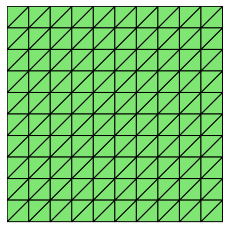

In [3]:
from fealpy.mesh import MeshFactory as MF

mesh = MF.boxmesh2d(pde.domain(), nx=10, ny=10, meshtype='tri')
mesh.add_plot(plt)

In [4]:
from fealpy.functionspace import LagrangeFiniteElementSpace

space = LagrangeFiniteElementSpace(mesh, p=1)
uh = space.function()
A = space.stiff_matrix()
F = space.source_vector(pde.source)

run serial_construct_matrix with time: 0.006687504937872291


In [5]:
from fealpy.boundarycondition import DirichletBC

bc = DirichletBC(space, pde.dirichlet)
A, F = bc.apply(A, F, uh)

In [6]:
from scipy.sparse.linalg import spsolve

uh[:] = spsolve(A, F)

In [7]:
L2error = space.integralalg.error(pde.solution, uh)
H1error = space.integralalg.error(pde.gradient, uh.grad_value)

print("L2 error: ", L2error)
print("H1 error: ", H1error)

L2 error:  0.012544252070103276
H1 error:  0.3466895183449495


<Axes3DSubplot:>

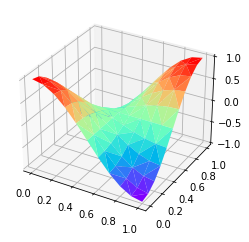

In [8]:
uh.add_plot(plt, cmap="rainbow")